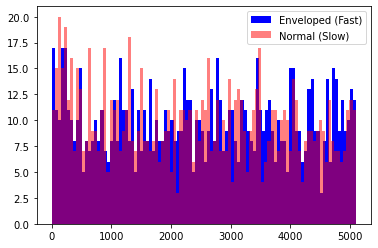

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# Read data
data = pd.read_csv('stroke-data-original.csv')

N = 1000
M = 1.0001
cutoff = 77
gx = np.ones(cutoff) * max(data['age'])
gx = np.append( gx, np.ones(len(data['bmi'])-cutoff) * data['age'][cutoff-1] )
histx = []
while N > 0: 
    rx = random.randint(0,len(gx)-1)
    ry = random.uniform(0,1)
    if ry < data['age'][rx]/(M*gx[rx]):
        histx.append(rx)
        N += -1
plt.hist(histx, bins=100, histtype='stepfilled', color='b',label='Enveloped (Fast)')

# Rejection-sampling MC (with envelope function gx at rank=77)
N2 = 1000
histy = []
while N2 > 0: 
    rx2 = random.randint(0,len(gx)-1)
    ry2 = random.uniform(0,max(data['age']))
    if ry2 < data['age'][rx2]:
        histy.append(rx2)
        N2 += -1
plt.hist(histy, bins=100, histtype='stepfilled', color='r', alpha=0.5, label='Normal (Slow)')
plt.legend()
plt.show()

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [3]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.781891,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [4]:
data[['age']]=data[['age']].apply(lambda col:pd.Categorical(col).codes)
data[['gender']]=data[['gender']].apply(lambda col:pd.Categorical(col).codes)
data[['ever_married']]=data[['ever_married']].apply(lambda col:pd.Categorical(col).codes)
data[['work_type']]=data[['work_type']].apply(lambda col:pd.Categorical(col).codes)
data[['Residence_type']]=data[['Residence_type']].apply(lambda col:pd.Categorical(col).codes)
data[['avg_glucose_level']]=data[['avg_glucose_level']].apply(lambda col:pd.Categorical(col).codes)
data[['bmi']]=data[['bmi']].apply(lambda col:pd.Categorical(col).codes)
data[['smoking_status']]=data[['smoking_status']].apply(lambda col:pd.Categorical(col).codes)
data[['stroke']]=data[['stroke']].apply(lambda col:pd.Categorical(col).codes)

In [5]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,439,1,1
1,0,82,0,0,1,3,0,3588,297,2,1
2,1,101,0,1,1,2,0,2483,358,2,1
3,0,70,0,0,1,2,1,3385,405,3,1
4,0,100,1,0,1,3,0,3394,117,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             5110 non-null   int8 
 1   age                5110 non-null   int8 
 2   hypertension       5110 non-null   int64
 3   heart_disease      5110 non-null   int64
 4   ever_married       5110 non-null   int8 
 5   work_type          5110 non-null   int8 
 6   Residence_type     5110 non-null   int8 
 7   avg_glucose_level  5110 non-null   int16
 8   bmi                5110 non-null   int16
 9   smoking_status     5110 non-null   int8 
 10  stroke             5110 non-null   int8 
dtypes: int16(2), int64(2), int8(7)
memory usage: 134.9 KB


In [7]:
x=data.drop('stroke',axis=1)
y=data[['stroke']]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# 1. bayesian network

In [9]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(x_train,y_train)

C:\Users\91700\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BernoulliNB()

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
bayesian = nb.predict(x_test)
accuracy_score(y_test,bayesian)

0.943094250148192

In [12]:
print(classification_report(y_test,bayesian))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687



C:\Users\91700\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91700\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91700\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [24]:
list=[0,1]

In [ ]:
Z=128
pos=[1,4,7,9]
pZgB=0
num=0
den=0
bval=128
n=128;
pBgZ=0
alpha=0.1
num=0
den=0
N=10
bitlist=[0,1]
formula=((1-alpha)/(1+alpha))*(alpha**(abs(Z-bval)))
def byteOrder(bitlist,pos):
    bits=[]
    for i in range(0,5):
        bits.append(random.choice(list))
    return bits
#converts binary to decimal
def evalbin(bits):
    bval=0
    p=0
    for i in range(0,5):
        p=2**i
        bval+=p*bits[i]
    return bval
Z=128
alpha=0.1
pBgZ=0
N=1000000
#evaluates the conditional probability
def ForEachPos(Z,alpha,pBgZ,N,pos):
    num=0
    den=0
    for i in range(0,N):
        bits=byteOrder(bitlist,pos)
        #print(bits)
        bval=evalbin(bits)
        pZgB=((1-alpha)/(1+alpha))*(alpha**(abs(Z-bval)))
        #print(pZgB)
        den+=pZgB
        #print(den)
        if(bits[pos]==1):
            num+=pZgB
    pBgZ=num/den
    return float(pBgZ)
num=0
den=0
Z=128
pBgZ=0
alpha=0.1
pos=[1,4,7,9]
iterations=[1.0e6*round(i,2) for i in np.arange(1,1.7,0.1)]
plt_answers=np.zeros([4,7])
for ipos,ps in enumerate(pos):
    for j,itr in enumerate(iterations):
        pBgZ=0
        plt_answers[ipos,j]=ForEachPos(Z,alpha,pBgZ,np.int(itr),ps)
print(plt_answers)

In [16]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns

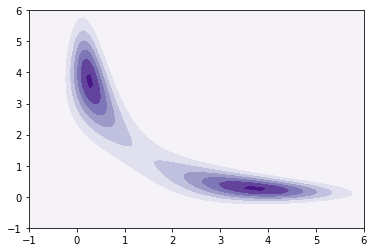

In [17]:
p = lambda x, y: np.exp(-((x*y)**2 + x**2 + y**2 - 8*x - 8*y)/2.)

xvals_p, yvals_p = np.meshgrid(np.linspace(-1, 6, 100), np.linspace(-1, 6, 100))

plt.contourf(xvals_p, yvals_p, p(xvals_p, yvals_p), cmap="Purples")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'label'


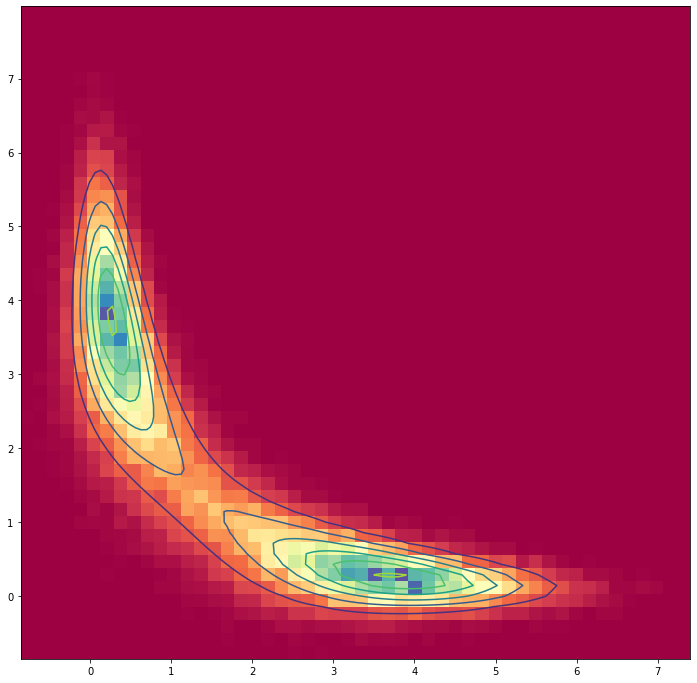

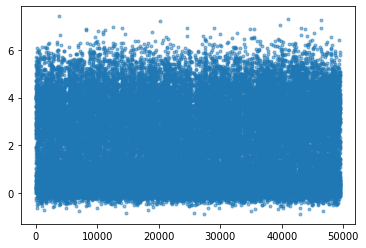

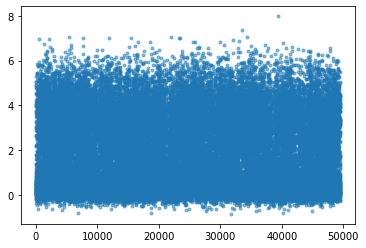

In [20]:
N = 50000

x_min = -1
x_max = 6
y_min = -1
y_max = 6

x = np.random.uniform(x_min, x_max)
y = np.random.uniform(y_min, y_max)

X, Y = [], []

for i in range(N):
    x = np.random.normal(loc=4./(1+y**2), scale=1/np.sqrt(1 + y**2))
    y = np.random.normal(loc=4./(1+x**2), scale=1/np.sqrt(1 + x**2))

    X.append(x); Y.append(y)

X, Y = X[500:-1], Y[500:-1]

plt.figure(figsize=[12,12])

plt.hist2d(X, Y, bins=50, cmap='Spectral')

plot_x, plot_y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max))

plt.contour(plot_x, plot_y, p(plot_x, plot_y), label=u'p(x,y)')
plt.show()

# traceplots
plt.plot(range(len(X)), X, '.', alpha=0.5)
plt.show()
plt.plot(range(len(Y)), Y, '.', alpha=0.5)
plt.show()

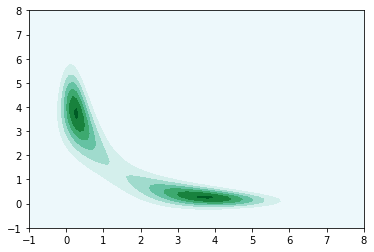

In [21]:
f= lambda x,y: np.exp(-(x*x*y*y+x*x+y*y-8*x-8*y)/2.)
xx=np.linspace(-1,8,100)
yy=np.linspace(-1,8,100)
xg,yg = np.meshgrid(xx,yy)
z=f(xg.ravel(),yg.ravel())
z2 = z.reshape(xg.shape)
z2
plt.contourf(xg,yg,z2, cmap="BuGn")